In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn import datasets, linear_model
import scipy.linalg as sla



In [262]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [263]:
data, label = np.array(boston_df)[:, 1:13], np.array(boston_df)[:, 13]


In [264]:
data.shape, label.shape

((506, 12), (506,))

In [265]:

W_full = None
def mse(preds, y):  
    #Cреднеквадратичная ошибку между preds и y.   
    return ((preds - y)**2).mean()

def solve_weights(X, y):
  
    #Находит параметры W,b по методу наименьших квадратов для X и y    
    global W_full      
    N = X.shape[0]
    print(N)
    # добавляем к признакам фиктивную размерность, чтобы было удобнее находить bias     
    X_b = np.concatenate([np.ones((N,1)), X], axis=1)
    print(X_b)
    # используем формулу из метода наименьших квадратов
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
   
    


In [267]:
W, b

(array([ 4.24883214e-02,  2.80584246e-02,  2.82840874e+00, -1.70182183e+01,
         3.84602671e+00,  5.47185316e-04, -1.39899389e+00,  2.47840386e-01,
        -1.21881352e-02, -9.43740929e-01,  1.03481181e-02, -5.50210277e-01]),
 array([35.37973508]))

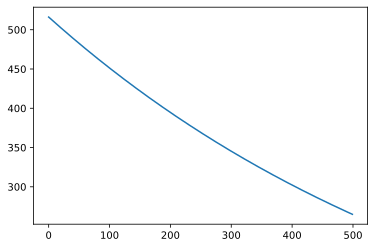

In [275]:
plt.plot(losses)

In [270]:
mse(predict(data), label)

22.375502523981414

In [272]:
W_full

array([ 3.53797351e+01,  4.24883214e-02,  2.80584246e-02,  2.82840874e+00,
       -1.70182183e+01,  3.84602671e+00,  5.47185316e-04, -1.39899389e+00,
        2.47840386e-01, -1.21881352e-02, -9.43740929e-01,  1.03481181e-02,
       -5.50210277e-01])

In [274]:
W_full.shape

(13,)